Libraries used

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2
from keras.preprocessing.image import img_to_array

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Creating the train data generator.

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

Training data which is present in drive

In [4]:
train_images = "/content/drive/MyDrive/chest_xray/train"

In [5]:
train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 5216 images belonging to 2 classes.


Model outputs

In [6]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

Validation data generator and loading validation data

In [7]:

test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/val',
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 16 images belonging to 2 classes.


Plotting : Images with Pneumonia from dataset

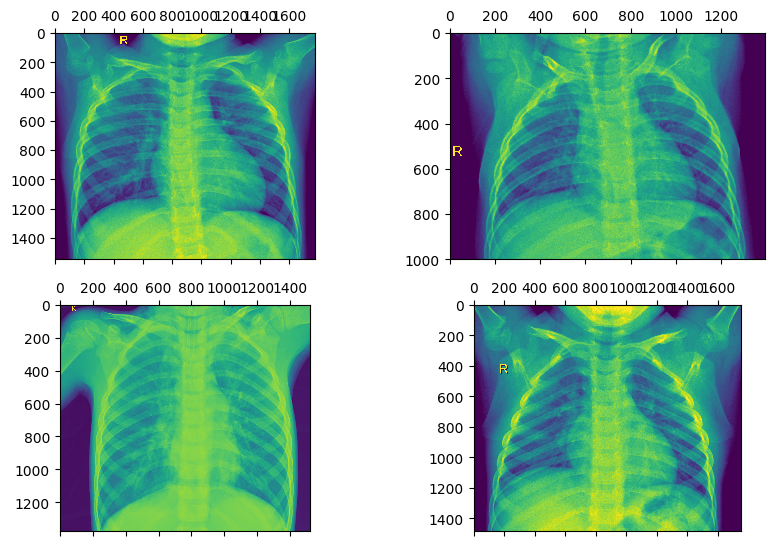

In [14]:
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot1.matshow(plt.imread(train_generator.filepaths[41]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))

Plotting : Images without Pneumonia from dataset.

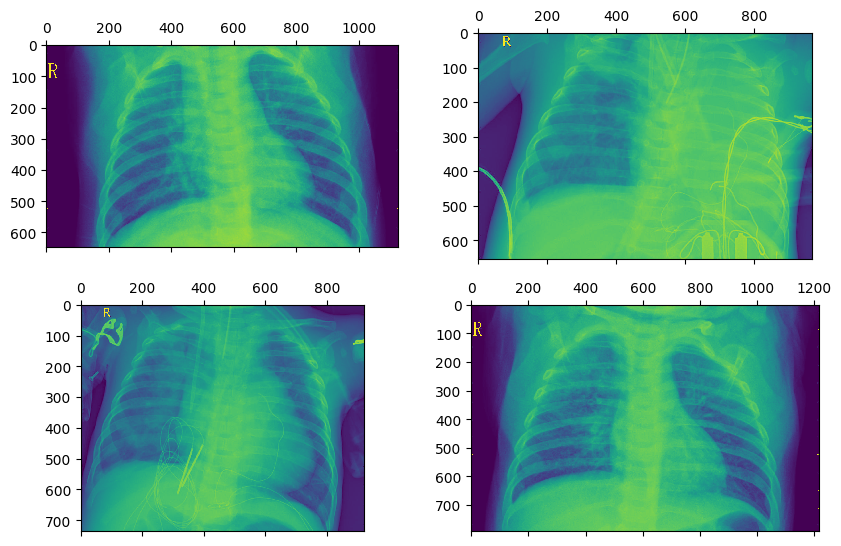

In [15]:
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot1.matshow(plt.imread(train_generator.filepaths[1419]))
plot2.matshow(plt.imread(train_generator.filepaths[1365]))
plot3.matshow(plt.imread(train_generator.filepaths[1400]))
plot4.matshow(plt.imread(train_generator.filepaths[1350]))


Neural Networks using TensorFlow
Metrics : Accuracy.

In [16]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 149, 149, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 35, 35, 64)       

Training the model for 5 epochs

In [17]:
history = model.fit(train_generator, epochs = 5, validation_data = validation_generator)

Epoch 1/5
41/41 [==============================] - 1069s 26s/step - loss: 0.5612 - accuracy: 0.7396 - val_loss: 0.8545 - val_accuracy: 0.7500
Epoch 2/5
41/41 [==============================] - 732s 18s/step - loss: 0.2693 - accuracy: 0.8873 - val_loss: 0.3432 - val_accuracy: 0.8750
Epoch 3/5
41/41 [==============================] - 731s 18s/step - loss: 0.2286 - accuracy: 0.9032 - val_loss: 1.3237 - val_accuracy: 0.6875
Epoch 4/5
41/41 [==============================] - 724s 18s/step - loss: 0.2051 - accuracy: 0.9185 - val_loss: 1.0548 - val_accuracy: 0.6875
Epoch 5/5
41/41 [==============================] - 723s 17s/step - loss: 0.1622 - accuracy: 0.9362 - val_loss: 1.1632 - val_accuracy: 0.6875


In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

Plotting Loss Vs Num. of Epochs

Loss Vs Num. of Epochs
Training Loss : 0.0519 
Value loss : 0.0701


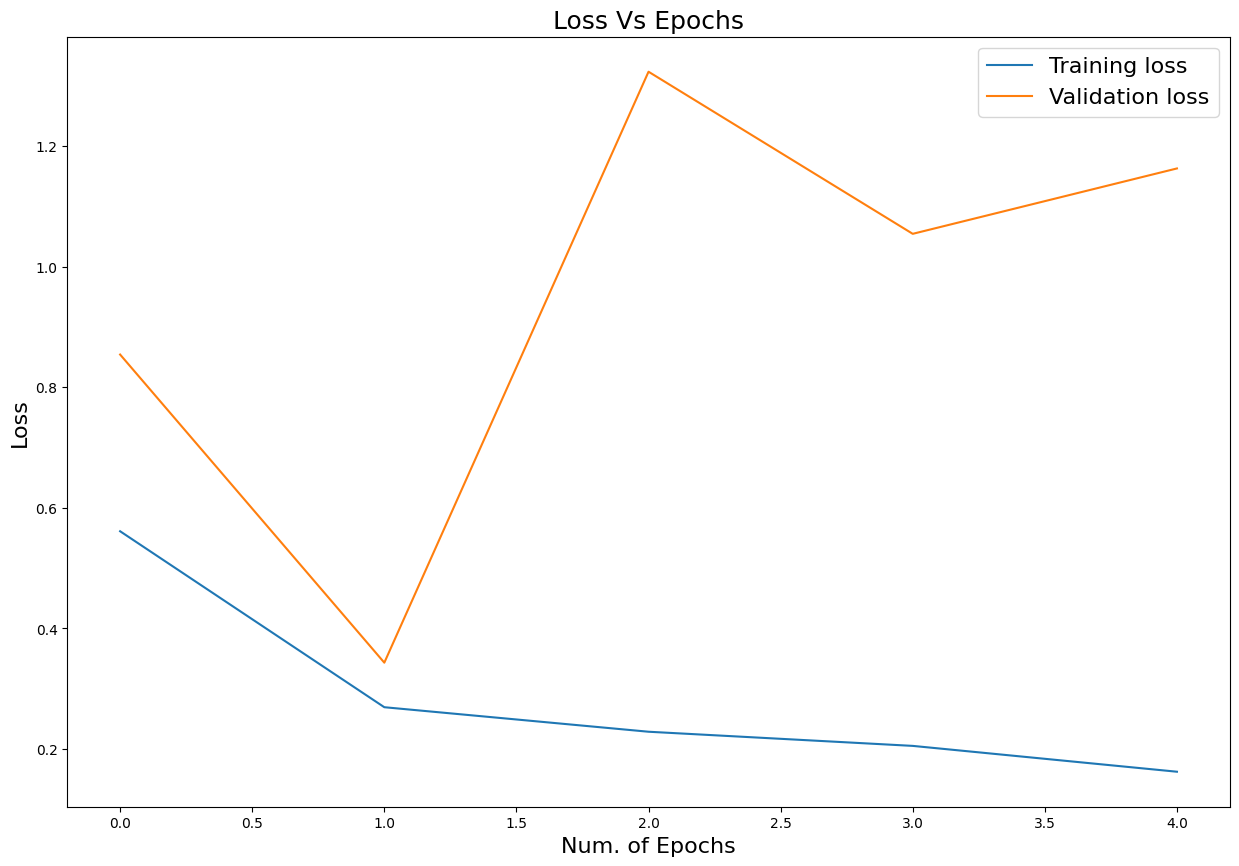

In [19]:
plt.figure(figsize=(15, 10))
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss','Validation loss'], fontsize=16)
plt.title("Loss Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
print("Loss Vs Num. of Epochs")
print("Training Loss : 0.0519","\nValue loss : 0.0701")
plt.show()

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Plotting Accuracy Vs Num. of Epochs

Accuracy Vs Epochs
Training accuracy : 0.9816 
Value accuracy : 1.0000


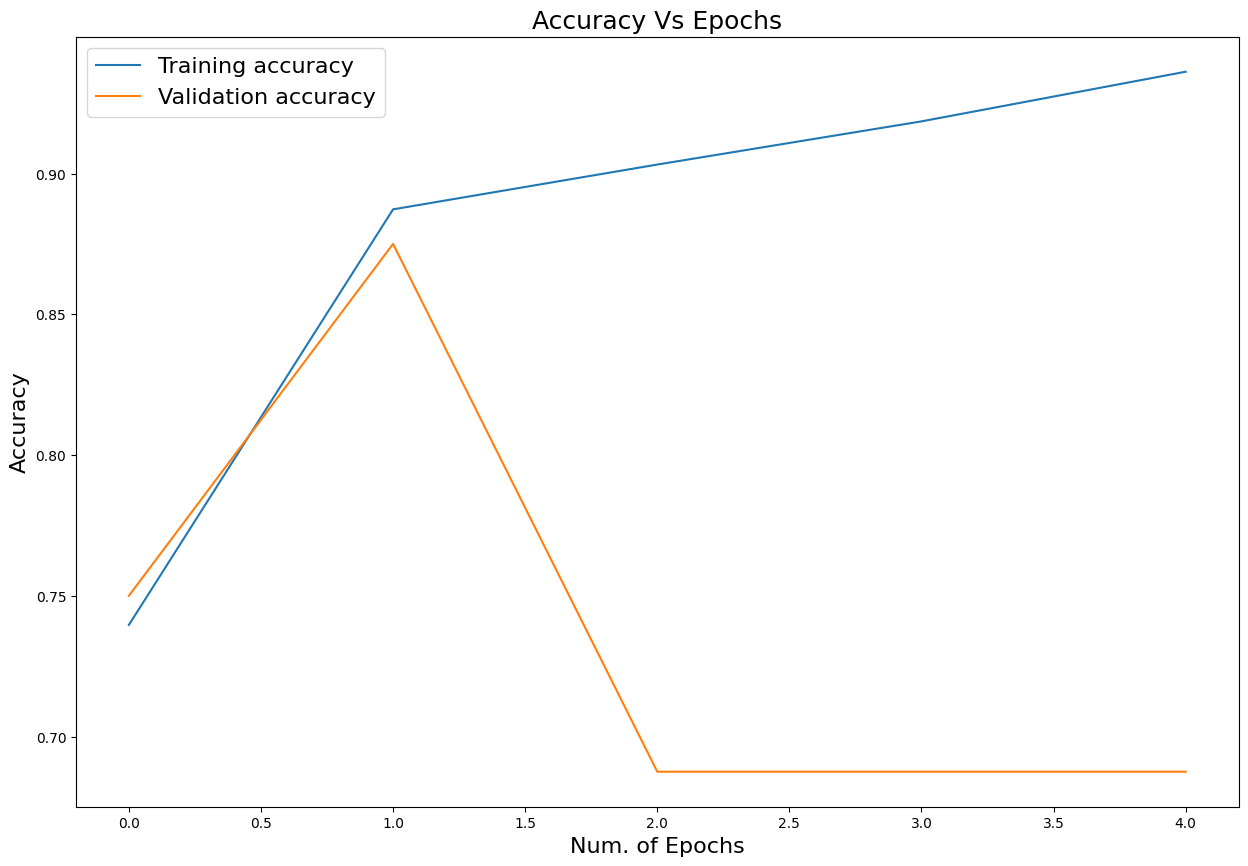

In [21]:
plt.figure(figsize=(15, 10))
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['Training accuracy','Validation accuracy'], fontsize=16)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
print("Accuracy Vs Epochs")
print("Training accuracy : 0.9816","\nValue accuracy : 1.0000")
plt.show()

Saving the model

In [22]:
model.save("trained.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Loading the saved model

In [23]:
from keras.models import load_model
model = load_model("trained.h5")

An image is used from drive for prediction

In [25]:
img= cv2.imread('/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0017-0001.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)

1/1 [==============================] - 0s 352ms/step


array([[0.08371315]], dtype=float32)

1/1 [==============================] - 0s 56ms/step
Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

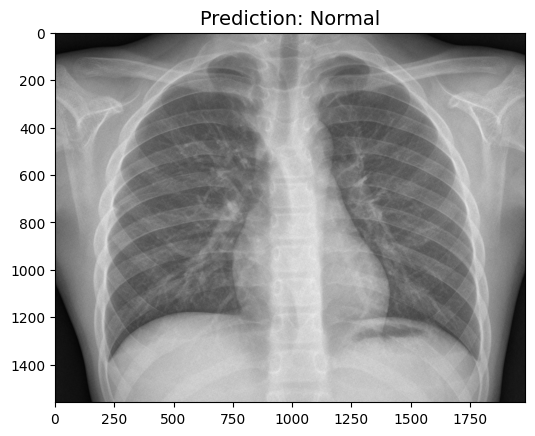

In [26]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

In [27]:

img= cv2.imread('/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person104_bacteria_492.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)


1/1 [==============================] - 0s 48ms/step


array([[0.99991286]], dtype=float32)

1/1 [==============================] - 0s 45ms/step
Prediction: Pneumonia


Text(0.5, 1.0, 'Prediction: Pneumonia')

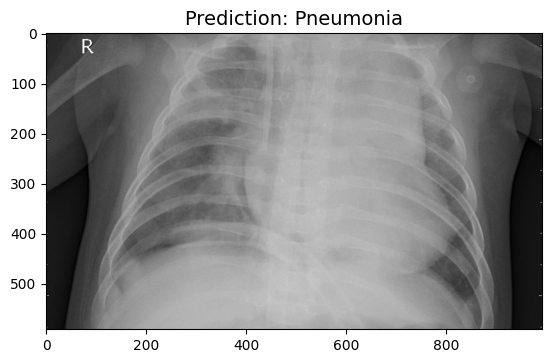

In [28]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)